In [328]:
using locaTE
using NPZ
using Discretizers

In [329]:
x, y = npzread("x.npy")[:, 1:1], npzread("y.npy")[:, 1:1];

In [330]:
disc_x, disc_y = locaTE.discretization(vec(x); alg=DiscretizeUniformWidth(8)), locaTE.discretization(vec(y); alg=DiscretizeUniformWidth(8))

(([-2.302324013178326, -1.8849168619246253, -1.4675097106709245, -1.050102559417224, -0.6326954081635232, -0.2152882569098225, 0.2021188943438782, 0.6195260455975788, 1.0369331968512796], [2, 3, 3, 3, 4, 3, 4, 4, 4, 4  …  1, 2, 1, 1, 1, 1, 1, 1, 1, 1]), ([-2.302562316250394, -1.8634394564971324, -1.424316596743871, -0.9851937369906093, -0.5460708772373478, -0.1069480174840863, 0.3321748422691752, 0.7712977020224367, 1.2104205617756982], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [331]:
X = hcat(vec(x), vec(y));

In [354]:
using LinearAlgebra
using SparseArrays
T = spzeros(size(X, 1), size(X, 1))
for k = 1:25
    T[diagind(T, k)] .= 1;
end
T /= sum(T)
_I, _J, _V = findnz(T)

([1, 1, 2, 1, 2, 3, 1, 2, 3, 4  …  989, 990, 991, 992, 993, 994, 995, 996, 997, 998], [2, 3, 3, 4, 4, 4, 5, 5, 5, 5  …  999, 999, 999, 999, 999, 999, 999, 999, 999, 999], [4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5  …  4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5, 4.0567951318458416e-5])

In [355]:
P = zeros(length(disc_x[1])-1, length(disc_y[1])-1, length(disc_y[1])-1);
locaTE.discretized_joint_distribution!(P, _I, _J, _V, disc_x[2], disc_y[2], disc_y[2])

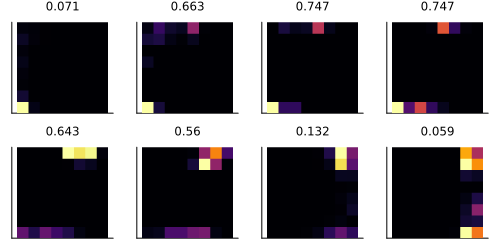

In [356]:
using Plots
plt=plot([heatmap(P[:, :, i], aspect_ratio = :equal, title = "$(round(get_mutual_information(normalize(P[:, :, i], 1)), digits = 3))", titlefontsize = 8) for i = 1:size(P, 3)]...; colorbar = nothing, xaxis = nothing, yaxis = nothing, layout = (2, 4), size = (500, 250))
savefig("joint_probs.pdf")
plt

In [357]:
get_conditional_mutual_information(P)

0.15963542587040536

In [358]:
dot([get_mutual_information(normalize(P[:, :, i], 1)) for i = 1:size(P, 3)], sum(P; dims = (1, 2)))

0.15963542587040638

In [359]:
P = zeros(length(disc_x[1])-1, length(disc_y[1])-1, length(disc_y[1])-1);
locaTE.discretized_joint_distribution!(P, _I, _J, _V, disc_y[2], disc_x[2], disc_x[2])

In [360]:
get_conditional_mutual_information(P)

0.07895741167711678